In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16,decode_predictions,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np



### 전이학습

In [2]:
# model_conv = ResNet50()

In [3]:
# include_top = False --> 특징 추출기 쪽만 가져오기
# model_conv = ResNet50(weights='imagenet',
#                       include_top = False, input_shape=(98,98,3))

model_conv = VGG16(weights='imagenet',
                      include_top = False, input_shape=(98,98,3))

In [4]:
model_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 98, 98, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 98, 98, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 98, 98, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 49, 49, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 49, 49, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 49, 49, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

In [5]:
from tensorflow.keras.preprocessing import image

In [6]:
#특징 추출기는 학습시 제외
for layer in model_conv.layers:
    layer.trainable = False
    

In [7]:
dataGen = image.ImageDataGenerator( rescale=1./255 )

In [8]:
trainGen = dataGen.flow_from_directory( 'dental/train', target_size=(98,98),batch_size=150)

Found 150 images belonging to 3 classes.


In [9]:
x_train , y_train = trainGen.next()

In [10]:
model_conv

In [11]:
model = Sequential()
model.add(model_conv) # con, relu, pool
model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 3, activation='softmax'))
# model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['acc'])
#미세조정..
model.compile(loss = 'categorical_crossentropy',
              optimizer= RMSprop(learning_rate=1e-4), metrics=['acc'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 455ms/step - loss: 1.1239 - acc: 0.3800
Epoch 2/100
5/5 [==============================] - 2s 434ms/step - loss: 1.0038 - acc: 0.5600
Epoch 3/100
5/5 [==============================] - 2s 451ms/step - loss: 0.9601 - acc: 0.5333
Epoch 4/100
5/5 [==============================] - 2s 403ms/step - loss: 0.8853 - acc: 0.6667
Epoch 5/100
5/5 [==============================] - 2s 430ms/step - loss: 0.8204 - acc: 0.7133
Epoch 6/100
5/5 [==============================] - 2s 375ms/step - loss: 0.7852 - acc: 0.7067
Epoch 7/100
5/5 [==============================] - 2s 380ms/step - loss: 0.7428 - acc: 0.7533
Epoch 8/100
5/5 [==============================] - 2s 399ms/step - loss: 0.6949 - acc: 0.7733
Epoch 9/100
5/5 [==============================] - 2s 414ms/step - loss: 0.6793 - acc: 0.8267
Epoch 10/100
5/5 [==============================] - 2s 391ms/step - loss: 0.6199 - acc: 0.8400
Epoch 11/100
5/5 [==============================] - 2s 398m

5/5 [==============================] - 2s 395ms/step - loss: 0.0078 - acc: 1.0000
Epoch 88/100
5/5 [==============================] - 2s 419ms/step - loss: 0.0072 - acc: 1.0000
Epoch 89/100
5/5 [==============================] - 2s 391ms/step - loss: 0.0098 - acc: 1.0000
Epoch 90/100
5/5 [==============================] - 2s 411ms/step - loss: 0.0067 - acc: 1.0000
Epoch 91/100
5/5 [==============================] - 2s 393ms/step - loss: 0.0055 - acc: 1.0000
Epoch 92/100
5/5 [==============================] - 2s 380ms/step - loss: 0.0054 - acc: 1.0000
Epoch 93/100
5/5 [==============================] - 2s 397ms/step - loss: 0.0057 - acc: 1.0000
Epoch 94/100
5/5 [==============================] - 2s 428ms/step - loss: 0.0046 - acc: 1.0000
Epoch 95/100
5/5 [==============================] - 2s 395ms/step - loss: 0.0074 - acc: 1.0000
Epoch 96/100
5/5 [==============================] - 2s 436ms/step - loss: 0.0039 - acc: 1.0000
Epoch 97/100
5/5 [==============================] - 2s 414ms/st

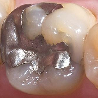

In [12]:
testImg = image.load_img( 'dental/test/cured/301.jpg', target_size=(98,98))
testImg

In [13]:
imgArr = image.img_to_array(testImg)

In [14]:
list(model.predict(preprocess_input(np.expand_dims(imgArr, axis=0))).argmax(axis=1))[0]

0

In [20]:
trainGen = dataGen.flow_from_directory( 'dental/test', target_size=(98,98),batch_size=60)
x_test , y_test = trainGen.next()

Found 60 images belonging to 3 classes.


In [21]:
model.evaluate(x_train,y_train)

5/5 [==============================] - 2s 385ms/step - loss: 0.0043 - acc: 1.0000


[0.004256121348589659, 1.0]

In [22]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 1s 350ms/step - loss: 1.5330 - acc: 0.6833


[1.5330458879470825, 0.6833333373069763]